# Рынок заведений общественного питания Москвы


<b>Цель проекта</b>
    
Используя открытые данные подготовить исследование рынка общественного питания в городе Москва. Дать рекомендации для открытия нового заведения, которое будут обслуживать роботы.




<b>Требуемые шаги:</b>   
<li>Исследование соотношения видов объектов общественного питания по количеству</li>
<li>Исследование соотношения сетевых и несетевых заведений по количеству</li>
<li>Определение вида объекта общественного питания, для которого характерно сетевое распространение</li>
<li>Характеристика сетевых заведений</li>
<li>Среднее количество посадочных мест для каждого вида объекта общественного питания</li>
<li>Определение топ-10 улиц по количеству объектов общественного питания</li>
<li>Определение числа улиц с одним объектом общественного питания</li>
<li>Закономерности распределения количества посадочных мест для улиц с большим количеством объектов общественного питания</li>

По результатам исследования необходимо дать рекомендации о возможности развития сети: о виде заведения, количестве посадочных мест, а также районе расположения.


##  Предобработка данных

**Импорт библиотек**

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import warnings
warnings.filterwarnings('ignore')

**Откроем файл и изучим данные**

In [2]:
try:
    rest_data = pd.read_csv('/datasets/rest_data.csv')
except:
    rest_data = pd.read_csv('rest_data.csv')
rest_data.head()

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


Посмотрим общую информацию о датасете:

In [3]:
rest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


Типы данных соответствуют, пропуски отсутствуют. Проверим наличие дубликатов:

In [4]:
rest_data.duplicated().sum()

0

Проверим, что количество объектов соответствуют количеству уникальных идентификаторов id:

In [5]:
print(rest_data['id'].nunique())

15366


Как видно, названия объектов общественного питания object_name имеют разный регистр. Для удобства приведем к единому виду:

In [6]:
rest_data['object_name'] = rest_data['object_name'].str.lower()
print(rest_data['object_name'].value_counts()) 

столовая                             321
кафе                                 278
шаурма                               250
шоколадница                          158
kfc                                  155
                                    ... 
ресторан на болотном                   1
sushisale                              1
кафетерий-кондитерская «ватрушка»      1
ресторан «пикколо диаболо»             1
хан кебаб                              1
Name: object_name, Length: 9924, dtype: int64


Проверим, нет ли аномальных данных (помимо "нет" и "да") в столбце chain - сетевой ресторан: 

In [7]:
print(rest_data['chain'].unique())

['нет' 'да']


Определим, какие типы объекта общественного питания object_type представлены:

In [8]:
print(rest_data['object_type'].unique())

['кафе' 'столовая' 'закусочная' 'предприятие быстрого обслуживания'
 'ресторан' 'кафетерий' 'буфет' 'бар' 'магазин (отдел кулинарии)']


Посмотрим, какое количество заведений может быть расположено по одному адресу:

In [9]:
print(rest_data['address'].value_counts())

город Москва, Ходынский бульвар, дом 4                        95
город Москва, Пресненская набережная, дом 2                   63
город Москва, проспект Мира, дом 211, корпус 2                60
город Москва, Кировоградская улица, дом 13А                   53
город Москва, площадь Киевского Вокзала, дом 2                48
                                                              ..
город Москва, Кустанайская улица, дом 10, корпус 2             1
город Москва, Щукинская улица, дом 1                           1
город Москва, улица Цюрупы, дом 14Б                            1
город Москва, Верхняя Радищевская улица, дом 7, строение 1     1
город Москва, Нагорный бульвар, дом 5, корпус 1                1
Name: address, Length: 9108, dtype: int64


Определим возможные вариации посадочных мест:

In [10]:
print(rest_data['number'].unique())

[  48   35   95   40   50  240   10   90  150  120    5   24  140   32
  270  320    7    2  160   20   30  110    6  192   65   45    4  125
  100   49   63   70   22   56   38  220   78    3   80   46   15   96
   60   47  180  250  200   25   12   14   16  420   98   75   34  216
   43   54  580  159    0   28   64   67   42  124   82   36  114    8
   71   18  158   55  196   44   76  144   41   26   68  143  198   79
    1   86  148  190  202  131   52   92  300   85  102   88   84  246
   81   94   23   37   39   99   61   11  130   74  128  106   58  260
   27   19   29   13    9  168  350   93   33  105  239  104   17   62
  230  132   87   89  170   83   21  108  210   51   53  115   66  280
  126   97  356  156  428  380  138   72  118  139  236  450  194  330
  225  500  112  109  146  306  272  290  176  175  252  122  400  542
  424 1040  660  282  145  395  188  149  157  103   69  184  185  121
  187  247  217  313  155  310  328  101  226  398  430  166  301  245
  238 

Для удобства отображения переименуем некоторые значения типов объектов общественного питания:

In [11]:
rest_data = rest_data.replace({'object_type' :{'предприятие быстрого обслуживания' : 'фаст-фуд', 'магазин (отдел кулинарии)' : 'отдел кулинарии'}})


<b>Вывод по результатам предобработки:</b>  
<li>типы данных соответствуют, преобразований не требуется</li>
<li>пропуски отсутствуют, как и дубликаты</li>
<li>идентификатор заведения id является уникальным для каждого заведения</li>
<li>названия объектов общественного питания были приведены к единому виду</li>
<li>принадлежность к сети представлена двумя возможными значениями - "да" и "нет"</li>
<li>заведения общественного питания имеют следующие типы:"кафе", "столовая", "закусочная", "предприятие быстрого обслуживания",
 "ресторан", "кафетерий", "буфет", "бар", "магазин (отдел кулинарии)" </li>
<li>по одному адресу может быть расположено большое количество заведений, что не является аномалией, так как заведения могут быть расположены в торговом центре </li>
<li>заведение может не иметь посадочных мест (равно 0), так как может работать на вынос. Также возможно большое количество посадочных мест, в случае, например, банкетного зала или концертной площадки.</li>

По результатам предобработки принято решение не проводить лемматизацию названий объектов общественного питания, из-за похожести названий заведений и связанных с этим опасений некорректного объединения. При необходимости будем ориентироваться на имеющийся уникальный идентификатор заведения и признак сети.
    


# Исследование соотношения видов объектов общественного питания по количеству

In [12]:
rest_type_count = rest_data.groupby('object_type')['id'].count().reset_index().sort_values(by='id',ascending = False)
rest_type_count

,object_type,id
3,кафе,6099
7,столовая,2587
6,ресторан,2285
8,фаст-фуд,1923
0,бар,856
1,буфет,585
4,кафетерий,398
2,закусочная,360
5,отдел кулинарии,273


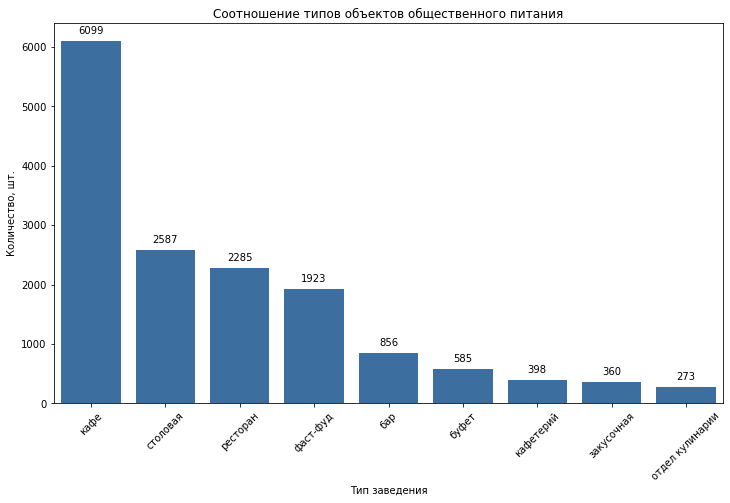

In [13]:
fig= plt.figure(figsize=(12,7))
sns.color_palette('pastel') 
splot = sns.barplot(x='object_type', y='id', data=rest_type_count, color = '#2b70b0')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center',  xytext = (0, 10), textcoords = 'offset points')

plt.title('Соотношение типов объектов общественного питания')
plt.xlabel('Тип заведения')
plt.ylabel('Количество, шт.')
plt.xticks(rotation = 45)
plt.show()

Можно заключить, что большинство заведений позиционируют себя как кафе. Численность можно объяснить тем, что кафе может иметь множество направленностей (например, кафе-пекарня, кафе-мороженое, придорожное кафе). Далее по распространенности идут столовые - 2587 объектов. Столовые работают в основном для обеспечения питанием работников (утреннее и обеденное время), и могут располагаться в зданиях предприятий, либо рядом с офис-центрами. Рестораны распространены чуть меньше - 2285 заведений. Далее располагаются предприятия быстрого обслуживания - 1923 заведения. Фаст-фуд характеризутся быстрым приготовлением пищи, а также минимальным или отсутствующим обслуживанием посетителей официантом. Гораздо меньше баров - 856 объектов, в барах больший акцент сделан на продаже алкоголя, что автоматически уменьшает возможную аудиторию. Буфеты реализуют ограниченный ассортимент продукции из полуфабрикатов, и их количество значительно ниже - 585 заведений. Кафетерии и закусочные распространены приблизительно одинаково - 398 и 360 заведений соответственно, они реализуют довольно ограниченный ассортимент продукции. Отдельно выделены отделы кулинарии в магазинах - 273 объекта, чаще всего такие магазины реализуют продукцию собственного приготовления.

# Исследование соотношения сетевых и несетевых заведений по количеству

In [14]:
chain_count = rest_data.pivot_table(index = 'object_type', columns = 'chain', values = 'id', aggfunc = 'count')
chain_count

chain,да,нет
object_type,,
бар,37,819
буфет,11,574
закусочная,56,304
кафе,1396,4703
кафетерий,52,346
отдел кулинарии,78,195
ресторан,544,1741
столовая,3,2584
фаст-фуд,791,1132


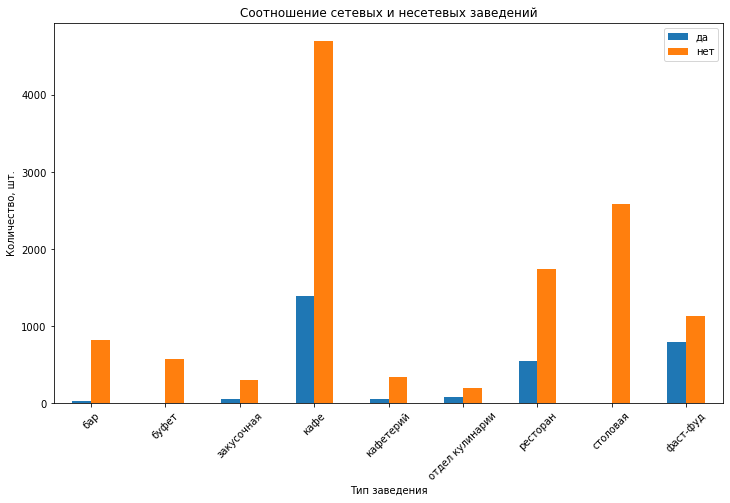

In [15]:
chain_count.plot(kind = 'bar', figsize=(12, 7))
plt.legend()
plt.title('Соотношение сетевых и несетевых заведений')
plt.xlabel('Тип заведения')
plt.ylabel('Количество, шт.')
plt.xticks(rotation = 45)
plt.show()

Большинство сетевых заведений - кафе, что обусловено, во-первых, большим количеством заведений такого типа, а во-вторых, как уже отмечалось ранее, узкой направленностью (например, кафе-кофейни). Также сетевыми являются большинство предприятий быстрого обслуживания - 791 заведение из 1132. Это может быть обусловлено распространенностью франшизы крупных сетей вроде KFC. По этой же причине треть ресторанов также сетевые. Отделы кулинарии часто располагаются в сетевых магазинах и гипермаркетах.  Оставвшиеся категории заведений - бары, буфеты, закусочные, кафетерии и столовые в основном не сетевые. 

# Характеристика сетевых заведений

Определим, что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест, или мало заведений с большим количеством посадочных мест.

In [16]:
rest_chain = rest_data.query('chain == "да"')
rest_chain

,id,object_name,chain,object_type,address,number
3,21894,пиццетория,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
6,148815,брусника,да,кафе,"город Москва, переулок Сивцев Вражек, дом 6/2",10
13,22579,алло пицца,да,кафе,"город Москва, улица Авиаторов, дом 14",32
16,144107,суши wok,да,фаст-фуд,"город Москва, Азовская улица, дом 3",7
18,58565,тануки,да,ресторан,"город Москва, Большая Академическая улица, дом 65",160
...,...,...,...,...,...,...
15361,208537,шоколадница,да,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50
15362,209264,шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",10
15363,209186,шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",20
15364,221900,шоколадница,да,кафе,"город Москва, поселение Московский, Киевское ш...",36


In [17]:
chain_seats = rest_chain.groupby(['object_name']).agg({'number':'median', 'id':'count'})
chain_seats

,number,id
object_name,,
beverly hills diner,88.0,1
bierloga,75.0,1
black & white,40.0,1
bocconcino,68.0,3
boobo,46.0,1
...,...,...
ямми микс,2.0,1
ян примус,300.0,1
японский ресторан «ваби-саби»,155.0,1


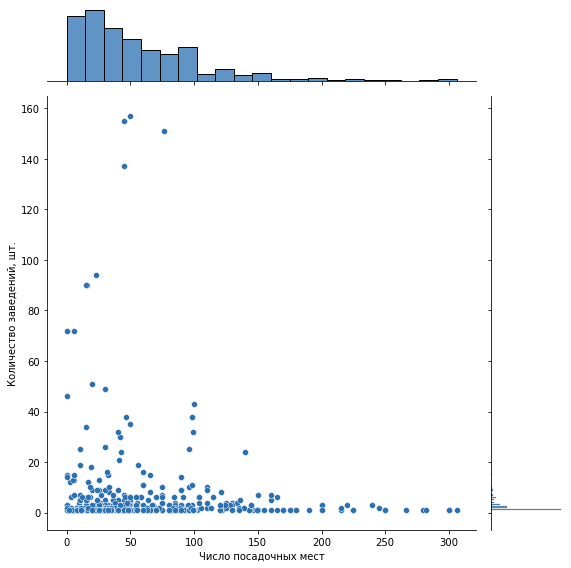

In [18]:
gr = sns.jointplot(x='number', y='id', data=chain_seats, height=8, color = '#2b70b0') 
gr.set_axis_labels(xlabel= "Число посадочных мест", ylabel="Количество заведений, шт.")
plt.show()

Из полученного представления можно сделать вывод, что для сетевых заведений более характерно много заведений с небольшим числом посадочных мест. Количество заведений с большим числом (больше 100) посадочных мест очень мало. Большинство заведений имеют в среднем до 50 мест. Также много заведений без мест вообще, эти заведения работают на вынос.

In [19]:
display(chain_seats['id'].mean(), chain_seats['id'].median())

5.143847487001733

1.0

# Среднее количество посадочных мест для каждого вида объекта общественного питания

In [20]:
seats_type = rest_data.groupby(['object_type']).agg({'number':'mean'}).reset_index().sort_values(by='number',ascending = False)
seats_type

,object_type,number
7,столовая,130.246618
6,ресторан,96.834136
1,буфет,51.129915
0,бар,43.494159
3,кафе,39.716019
8,фаст-фуд,20.552262
4,кафетерий,9.123116
2,закусочная,7.608333
5,отдел кулинарии,5.589744


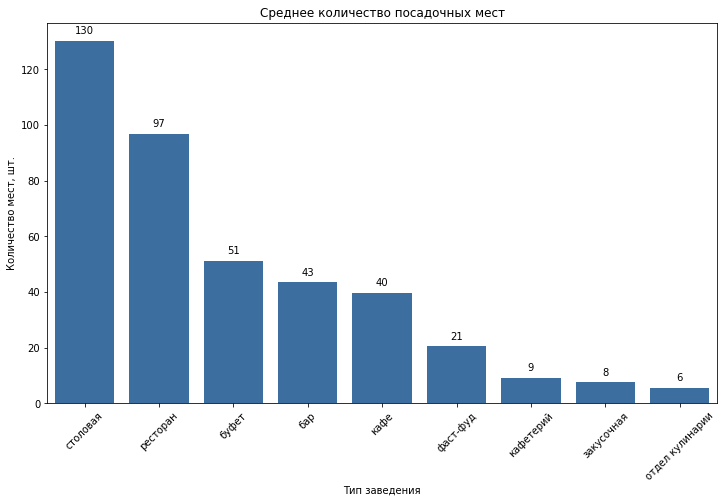

In [21]:
fig= plt.figure(figsize=(12,7))
sns.color_palette('pastel') 
splot = sns.barplot(x='object_type', y='number', data=seats_type, color = '#2b70b0')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center',  xytext = (0, 10), textcoords = 'offset points')

plt.title('Среднее количество посадочных мест')
plt.xlabel('Тип заведения')
plt.ylabel('Количество мест, шт.')
plt.xticks(rotation = 45)
plt.show()

Наибольшее количество посадочных мест в столовых - это может быть связано с тем, что для столовых характерны пиковые загрузки в определенные часы (например, в обеденное время), когда требуется посадить одновременно большое количество посетителей. В ресторанах также в среднем довольно большое количество мест, возможно из-за того, что ресторан больше воспринимается как место для отдыха, соответственно время пребывания в нем больше, чем в других заведениях. Также на время пребывания может повлиять более длительное время обслуживания и приготовления блюд. Буфеты бары и кафе находятся примерно на одном уровне по посадочным местам - от 40 до 50. Для фастфуда характерно небольшое количество посадочных мест - в среднем 21, что связано с малым временем пребывания в заведении, а также с тем, что из фастфуда часто берут блюда на вынос. Кафетерии, закусочные и отделы кулинарии имеют малое количество мест для посадки - таких заведений в принципе меньше, чем остальных, а также ассортимент довольно ограничен.

# Топ-10 улиц по количеству объектов общественного питания

Выделим в отдельный столбец информацию об улице из столбца address:

In [22]:
address_type = ['улица','площадь','проспект','бульвар','переулок','проезд','набережная','аллея','шоссе','тупик','просека']

def split_address(row):
    for element in row.split(', '):
        for address in address_type:
                if address in element:
                    return element
rest_data['street'] = rest_data['address'].apply(split_address)

rest_data.head()

,id,object_name,chain,object_type,address,number,street
0,151635,сметана,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова
1,77874,родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина
2,24309,кафе «академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица
3,21894,пиццетория,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,Абрамцевская улица
4,119365,кафе «вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,Абрамцевская улица


Добавим в таблицу информацию о районах города Москва воспользовавшись открытыми данными с сайта Мосгаза:

In [23]:
from io import BytesIO
import requests
spreadsheet_id = '1kWy6YsDQ07qjJ-T32oFDH0GgarNKkXlygk-QsCKv6Oc'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
mosgaz = pd.read_csv(BytesIO(r.content))
mosgaz

,street,areaid,okrug,area
0,Выставочный переулок,17,ЦАО,Пресненский район
1,улица Гашека,17,ЦАО,Пресненский район
2,Большая Никитская улица,17,ЦАО,Пресненский район
3,Глубокий переулок,17,ЦАО,Пресненский район
4,Большой Гнездниковский переулок,17,ЦАО,Пресненский район
...,...,...,...,...
4393,Вознесенский проезд,17,ЦАО,Пресненский район
4394,Волков переулок,17,ЦАО,Пресненский район
4395,Поварская улица,17,ЦАО,Пресненский район
4396,Кудринская площадь,17,ЦАО,Пресненский район


In [24]:
rest_data_full = rest_data.merge(mosgaz, on='street', how='left')
rest_data_full.head()

,id,object_name,chain,object_type,address,number,street,areaid,okrug,area
0,151635,сметана,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова,86.0,СВАО,Ярославский Район
1,77874,родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина,18.0,ЦАО,Таганский район
2,77874,родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина,117.0,ЮВАО,Нижегородский район
3,77874,родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина,133.0,ЮЗАО,Район Южное Бутово
4,24309,кафе «академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица,18.0,ЦАО,Таганский район


Определим топ-10 улиц с наибольшим количеством заведений:

In [25]:
top_10 = rest_data_full.groupby('street').agg({'id':'nunique'}).reset_index().sort_values(by='id',ascending = False)
top_10 = top_10.head(10)
top_10

,street,id
1415,проспект Мира,204
1007,Профсоюзная улица,183
680,Ленинградский проспект,173
991,Пресненская набережная,167
393,Варшавское шоссе,165
683,Ленинский проспект,148
1411,проспект Вернадского,132
670,Кутузовский проспект,114
593,Каширское шоссе,112
600,Кировоградская улица,110


Определим, к каким районам города Москвы принадлежат эти улицы:

In [26]:
pd.set_option('max_colwidth', 400)
street_10 = top_10['street']
top_10_area = rest_data_full.query('street in @street_10')
top_10_area.groupby('street').agg({'area': 'unique'})

,area
street,
Варшавское шоссе,"[Район Чертаново Центральное, Район Чертаново Северное, Район Чертаново Южное, Донской район, Район Нагатино-Садовники, Нагорный район, Район Северное Бутово, Район Южное Бутово]"
Каширское шоссе,"[Район Москворечье-Сабурово, Район Нагатино-Садовники, Район Орехово-Борисово Южное, Район Орехово-Борисово Северное]"
Кировоградская улица,"[Район Чертаново Центральное, Район Чертаново Северное, Район Чертаново Южное]"
Кутузовский проспект,"[Район Дорогомилово, Район Фили-Давыдково]"
Ленинградский проспект,"[Район Аэропорт, Район Беговой, Хорошевский район, Район Сокол]"
Ленинский проспект,"[Район Проспект Вернадского, Район Тропарево-Никулино, Донской район, Район Гагаринский, Ломоносовский район, Обручевский район, Район Теплый Стан, Район Якиманка]"
Пресненская набережная,[Пресненский район]
Профсоюзная улица,"[Академический район, Район Черемушки, Район Ясенево, Район Коньково, Обручевский район, Район Теплый Стан]"
проспект Вернадского,"[Район Проспект Вернадского, Район Раменки, Район Тропарево-Никулино, Район Гагаринский, Ломоносовский район]"


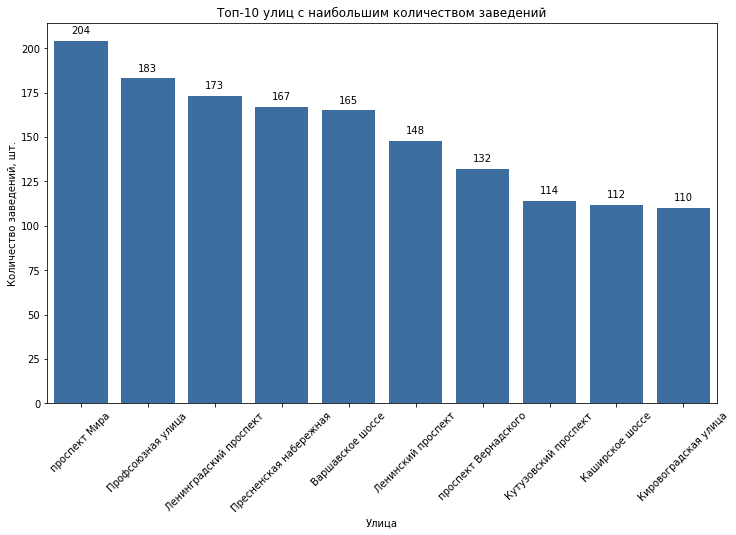

In [27]:
fig= plt.figure(figsize=(12,7))
sns.color_palette('pastel') 
splot = sns.barplot(x='street', y='id', data=top_10, color = '#2b70b0')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center',  xytext = (0, 10), textcoords = 'offset points')

plt.title('Топ-10 улиц с наибольшим количеством заведений')
plt.xlabel('Улица')
plt.ylabel('Количество заведений, шт.')
plt.xticks(rotation = 45)
plt.show()

Можно заметить, что большинство заведений расположено на крупных улицах города. Наибольшее количество заведений - от 173 до 204, расположено на проспекте Мира, Профсоюзной улице и Ленинградском проспекте. Эти улицы характеризуются большой протяженностью, и проходят через несколько районов города. На Пресненской набережной также расположено большое количество заведений, это деловой центр города. Варшавское шоссе и Ленинский проспект являются магистральными улицами большой протяженности, там раположено 165 и 148 заведений соответственно. На проспекте Вернадского, Кутузовском проспекте и Каширском шоссе и Кировградской улице точек общепита примерно поровну.

# Улицы с одним объектом общественного питания

Определим, на каких улицах горда Москвы расположено всего по одноу объекту общественного питания:

In [28]:
top_1 = rest_data_full.groupby('street').agg({'id':'nunique'}).reset_index().sort_values(by='id',ascending = True)
single = top_1.query('id =="1"')
single.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   street  0 non-null      object
 1   id      0 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 0.0+ bytes


Выявлено 546 улиц с только одним заведением. Определим районы, к которым принадлежат эти улицы:

In [29]:
pd.set_option('max_colwidth', 400)
street_single = top_1['street']
top_1_area = rest_data_full.query('street in @street_single')
top_1_area.groupby('area').agg({'street': 'unique'})

,street
area,
Академический район,"[улица Ивана Бабушкина, улица Вавилова, Нахимовский проспект, улица Кржижановского, Профсоюзная улица, улица Дмитрия Ульянова, улица Шверника, проспект 60-летия Октября, Новочерёмушкинская улица, Большая Черёмушкинская улица, улица Кедрова, улица Гримау, улица Винокурова]"
Алексеевский район,"[улица Бориса Галушкина, улица Кибальчича, улица Павла Корчагина, улица Космонавтов, проспект Мира, Ярославская улица, Маломосковская улица, Кучин переулок, Кулаков переулок, Староалексеевская улица, Графский переулок, 1-я Мытищинская улица, улица Касаткина, Зубарев переулок, 3-я Мытищинская улица, Новоалексеевская улица, 1-й Рижский переулок, улица Константинова, Рижский проезд]"
Алтуфьевский район,"[Алтуфьевское шоссе, Бибиревская улица, Путевой проезд, Инженерная улица, Стандартная улица, Костромская улица, улица Бегичева]"
Бабушкинский район,"[Анадырский проезд, Енисейская улица, улица Коминтерна, улица Менжинского, Осташковская улица, Староватутинский проезд, Печорская улица, Ленская улица, Радужная улица, Олонецкий проезд, улица Рудневой, Чукотский проезд, улица Лётчика Бабушкина, Кольская улица]"
Басманный район,"[Новая Басманная улица, Бауманская улица, Бригадирский переулок, улица Госпитальный Вал, улица Жуковского, улица Казакова, Старая Басманная улица, Мясницкая улица, Большой Козловский переулок, Большой Златоустинский переулок, Кривоколенный переулок, Ладожская улица, Лялин переулок, улица Макаренко, улица Покровка, улица Машкова, Новорязанская улица, улица Воронцово Поле, Подсосенский переулок,..."
...,...
Тверской район,"[2-я Брестская улица, Большая Бронная улица, Васильевская улица, Весковский переулок, Воротниковский переулок, Большая Никитская улица, Большой Гнездниковский переулок, Малый Гнездниковский переулок, Тверская улица, 1-я Тверская-Ямская улица, улица Чаянова, Большая Грузинская улица, улица Грузинский Вал, Большой Каретный переулок, Долгоруковская улица, 2-й Колобовский переулок, Лесная улица, Н..."
Тимирязевский Район,"[Большая Академическая улица, Бутырская улица, Дмитровское шоссе, улица Костякова, Лиственничная аллея, 3-й Нижнелихоборский проезд, Тимирязевская улица, Линейный проезд, улица Немчинова, улица Вучетича, Астрадамский проезд, Дмитровский проезд, улица Прянишникова, Тимирязевский проезд, Чуксин тупик, Локомотивный проезд, улица Дубки, Красностуденческий проезд, улица Линии Октябрьской Железной Д..."
Хорошевский район,"[Беговая улица, Ленинградский проспект, 1-й Хорошёвский проезд, Хорошёвское шоссе, Чапаевский переулок, улица Гризодубовой, проезд Берёзовой Рощи, улица Розанова, 2-й Магистральный тупик, 2-й Хорошёвский проезд, улица Зорге, улица Куусинена, улица Поликарпова, улица Острякова, проезд Аэропорта, 3-я Песчаная улица, 1-я Магистральная улица, улица Викторенко, 5-я Магистральная улица, 1-й Магистра..."


Какой-либо взаимосвязи малого количества заведений и района не наблюдается. В список попали как окраинные районы, так и центральные. Наличие только одной точки общепита может зависеть от ряда факторов, как например, длина улицы (слишком короткая); историческая застройка, которая может не попадать под стандарты заведений; расположение рядом с центральной улицей с большим количеством заведений; новый район, в котором заведения еще не открылись.

# Распределение количества посадочных мест для улиц с большим количеством объектов общественного питания

Для исследования обратимся к полученным ранее топ-10 улиц с большим количеством заведений:

In [30]:
top_seats = rest_data.query('street in @street_10')

In [31]:
top_street_seats = top_seats.groupby(['street']).agg({'number':'mean'}).sort_values(by='number',ascending = False)
top_street_seats

,number
street,
Кутузовский проспект,85.061404
проспект Вернадского,66.969697
Ленинский проспект,63.148649
проспект Мира,62.696078
Кировоградская улица,59.790909
Каширское шоссе,55.098214
Варшавское шоссе,52.278788
Ленинградский проспект,52.265896
Профсоюзная улица,47.360656


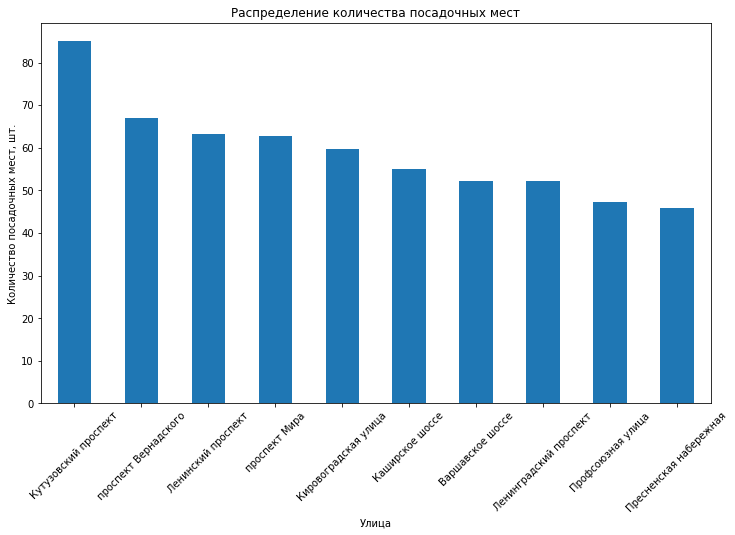

In [32]:
top_street_seats.plot(kind = 'bar', figsize=(12, 7), legend = False)
plt.title('Распределение количества посадочных мест')
plt.xlabel('Улица')
plt.ylabel('Количество посадочных мест, шт.')
plt.xticks(rotation = 45)
plt.show()

Можно заметить, что наибольшее количество мест в заведениях на Кутузовском проспекте, при том, что количество заведений меньше, чем на других улицах из топ-10. Возможно, на этой улице располагаются крупные банкет-залы либо концерт-холлы. На остальных улицах количество посадочных мест различается не сильно - от 50 до 65 мест в среднем. Скорее всего это преимущественно кафе и рестораны.

# Выводы


<b>По результатам исследования можно заключить:</b>  
<li>Наиболее популярным типом заведения является кафе. Далее идут рестораны, столовые и фастфуды</li>   
<li>Сетевых заведений гораздо меньше, чем не сетевых. Наиболее частые встречающиеся сетевые заведения - фастфуды, открытые по франшизе</li>
<li>Сетевые заведения имеют в среднем 50 посадочных мест</li>
<li>Наибольшее число посадочных мест в столовых и ресторанах - около 100 мест </li>
<li>Наибольшее число заведений располагается на длинных центральных и магистральных улицах</li>
<li>На улице может располагаться только одно заведение, вне зависимости от района</li>
<li>Для улиц с большим количеством объектов общественного питания характерно в среднем 50-70 посадочных мест</li>
    
Опираясь на вышеизложенное, можно дать следующие рекомендации для открытия нового заведения, которое будут обслуживать роботы:
<li>Наиболее предпочтительный вариант типа заведения - кафе, с средним количеством посадочных мест (50-60). Наиболее предпочтительный район расположения - Пресненский, хоть там и расположено большое количество заведений, в данном районе находятся международные и деловые центры, что обеспечит разнообразие посетителей и большую проходимость.</li>
<li>Для развития сети кафе необходимо также выбирать центральные улицы, возможно, в том числе улицы пропускающие через себя большой поток турисутов. Для расположения рекомендуется избегать торговых центров - в них чаще располагаются сети другого типа - быстрого питания.</li>

    
